# Poppy Mak 112154028
# CME 502 Final Project
## Plotting Useful Graphs for the Reaction Activity of Cobalt-Based Catalysts
## and Finding the Current Densities of Each Composition

In [95]:
# import all necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.stats import linregress

### Plotting the OER Activity in Alkaline Environments

In [76]:
# read the first excel sheet and assign them to the first set of dataframe

df1 = pd.read_excel("C:\\Users\\MakGod\\Downloads\\Raw data for CoIIinacid.xlsx", sheet_name = 'Figure 1')

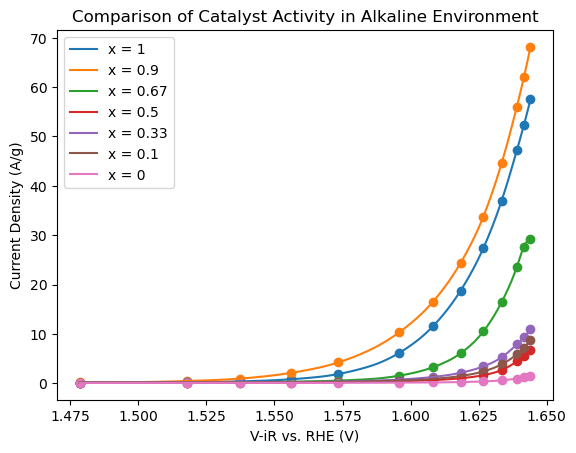

In [150]:
# create an empty list for the fitted lines
interpolations = []

# list of compositions
labels = ['1', '0.9', '0.67', '0.5', '0.33', '0.1', '0']

# for loop to plot all data and fitted lines into one plot
for i in range(7):
    xdata = df1.iloc[1:, 2 * 1 + 1]
    ydata = df1.iloc[1:, 2 * i + 2]
    s = interp1d(xdata, ydata, kind = 'quadratic')
    X = np.arange(np.min(xdata), np.max(xdata), 0.0001)
    Y = s(X)
    interpolations.append((X, Y))
    plt.scatter(xdata, ydata)
    
# for loop to make legend
for i, (X, Y) in enumerate(interpolations):
    plt.plot(X, Y, label = f'x = {labels[i]}')
    
plt.title('Comparison of Catalyst Activity in Alkaline Environment')
plt.xlabel('V-iR vs. RHE (V)')
plt.ylabel('Current Density (A/g)')
plt.legend()
plt.show()

### Plotting the OER Activity in Acidic Environments

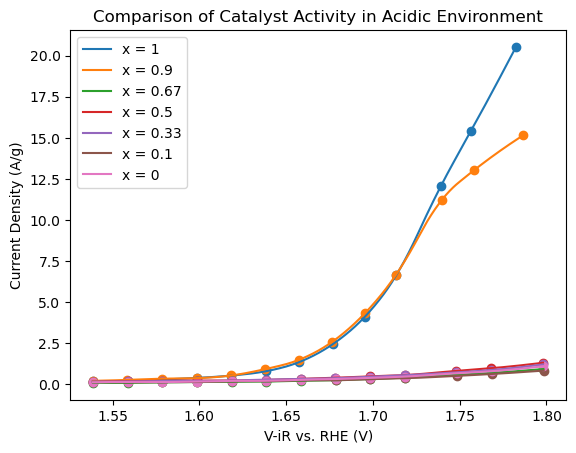

In [129]:
x = np.linspace(0, 10, 100)

interpolations = []
labels = ['1', '0.9', '0.67', '0.5', '0.33', '0.1', '0']

for i, x in enumerate(labels):
    xdata = df1.iloc[1:, 16 + i * 2]
    ydata = df1.iloc[1:, 17 + i * 2]
    s = interp1d(xdata, ydata, kind = 'quadratic')
    X = np.arange(np.min(xdata), np.max(xdata), 0.0001)
    Y = s(X)
    interpolations.append((X, Y))
    plt.scatter(xdata, ydata)
    
for i, (X, Y) in enumerate(interpolations):
    plt.plot(X, Y, label = f'x = {labels[i]}')
    
plt.title('Comparison of Catalyst Activity in Acidic Environment')
plt.xlabel('V-iR vs. RHE (V)')
plt.ylabel('Current Density (A/g)')
plt.legend()
plt.show()

### Plotting the Tafel Plot of Cobalt Catalysts in Alkaline Environment and Calculating Current Density

 0.5


Current Density for x =  1 :  8.11619026032535e-20 A/m^2
Current Density for x =  0.9 :  3.852451129244263e-18 A/m^2
Current Density for x =  0.67 :  4.120677352390687e-15 A/m^2
Current Density for x =  0.5 :  2.0404757083555787e-11 A/m^2
Current Density for x =  0.33 :  1.4309031087311565e-11 A/m^2
Current Density for x =  0.1 :  5.4990439840366424e-11 A/m^2
Current Density for x =  0 :  1.8661960492218997e-09 A/m^2


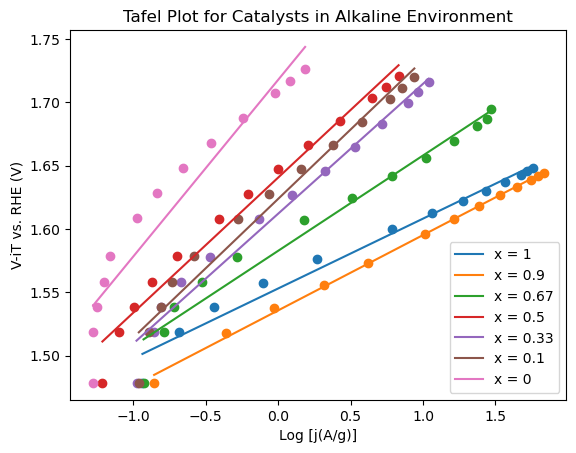

In [149]:
# a list of different compositions to used in legend
labels = [1, 0.9, 0.67, 0.5, 0.33, 0.1, 0]

# define the function to calculate current density
def current_density(overpotential, tafel_slope, intercept):
    '''
    Calculate current density(j) from overpotential using Tafel equation.
    
    Args:
    - overpotential: Overpotential in volts.
    - tafel_slope: Tafel slope (alpha) in volts per decade.
    - intercept: Intercept (beta) in volts
    
    Returns:
    - Current density (j) in A/m^2
    '''
    j = 10**((overpotential - intercept) / tafel_slope)
    return j

# user input for overpotention to find current density
overpotential = float(input()) # in volts

# for loop to plot all compositions' into one plot
for label in labels:
    x = df1.iloc[1:, 31 + 2 * labels.index(label)]
    y = df1.iloc[1:, 32 + 2 * labels.index(label)]
    slope, intercept, r_value, _, _ = linregress(x,y)
    alpha = slope * (8.314 * 298) / (96.485)
    plt.scatter(x, y)
    plt.plot(x, slope * x + intercept, label = f'x = {label}')
    tafel_slope = slope
    intercept = intercept
    current_density_value = current_density(overpotential, tafel_slope, intercept)
    print('Current Density for x = ', label, ': ', current_density_value, 'A/m^2')

plt.title('Tafel Plot for Catalysts in Alkaline Environment')
plt.xlabel('Log [j(A/g)]')
plt.ylabel('V-iT vs. RHE (V)')
plt.legend()
plt.show()

### Plotting Tafel Plot for Catalysts in Acidic Environment and Calculating Current Densities

 0.2


Current Density for x =  1 :  1.4573605843918577e-14 A/m^2
Current Density for x =  0.9 :  2.274678514598919e-13 A/m^2
Current Density for x =  0.67 :  2.2947625030278933e-07 A/m^2
Current Density for x =  0.5 :  1.8106566292330994e-06 A/m^2
Current Density for x =  0.33 :  3.068377642377744e-06 A/m^2
Current Density for x =  0.1 :  2.1808425484505967e-06 A/m^2
Current Density for x =  0 :  8.355447871563571e-07 A/m^2


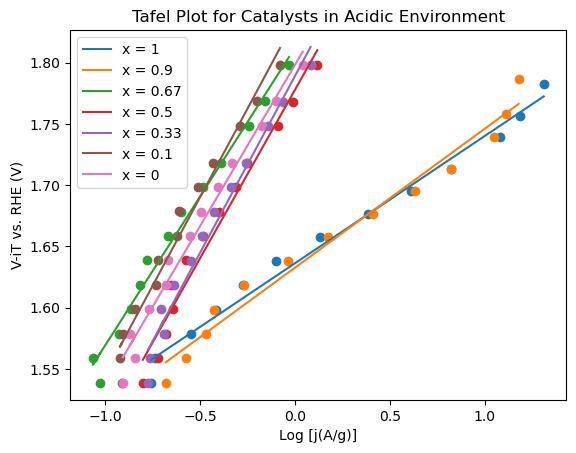

In [151]:
labels = [1, 0.9, 0.67, 0.5, 0.33, 0.1, 0]

# define the function to calculate current density
def current_density(overpotential, tafel_slope, intercept):
    '''
    Calculate current density(j) from overpotential using Tafel equation.
    
    Args:
    - overpotential: Overpotential in volts.
    - tafel_slope: Tafel slope (alpha) in volts per decade.
    - intercept: Intercept (beta) in volts
    
    Returns:
    - Current density (j) in A/m^2
    '''
    j = 10**((overpotential - intercept) / tafel_slope)
    return j

# user input for overpotention to find current density
overpotential = float(input()) # in volts

for label in labels:
    x = df1.iloc[1:, 46 + 2 * labels.index(label)]
    y = df1.iloc[1:, 47 + 2 * labels.index(label)]
    slope, intercept, r_value, _, _ = linregress(x,y)
    alpha = slope * (8.314 * 298) / (96.485)
    plt.scatter(x, y)
    plt.plot(x, slope * x + intercept, label = f'x = {label}')
    tafel_slope = slope
    intercept = intercept
    current_density_value = current_density(overpotential, tafel_slope, intercept)
    print('Current Density for x = ', label, ': ', current_density_value, 'A/m^2')

plt.title('Tafel Plot for Catalysts in Acidic Environment')
plt.xlabel('Log [j(A/g)]')
plt.ylabel('V-iT vs. RHE (V)')
plt.legend()
plt.show()

### Plotting the correlation of Surface State of Cobalt Catalysts with OER Activity in Acidic Environments

In [7]:
df2 = pd.read_excel("C:\\Users\\MakGod\\Downloads\\Raw data for CoIIinacid.xlsx", sheet_name = 'Figure 2')

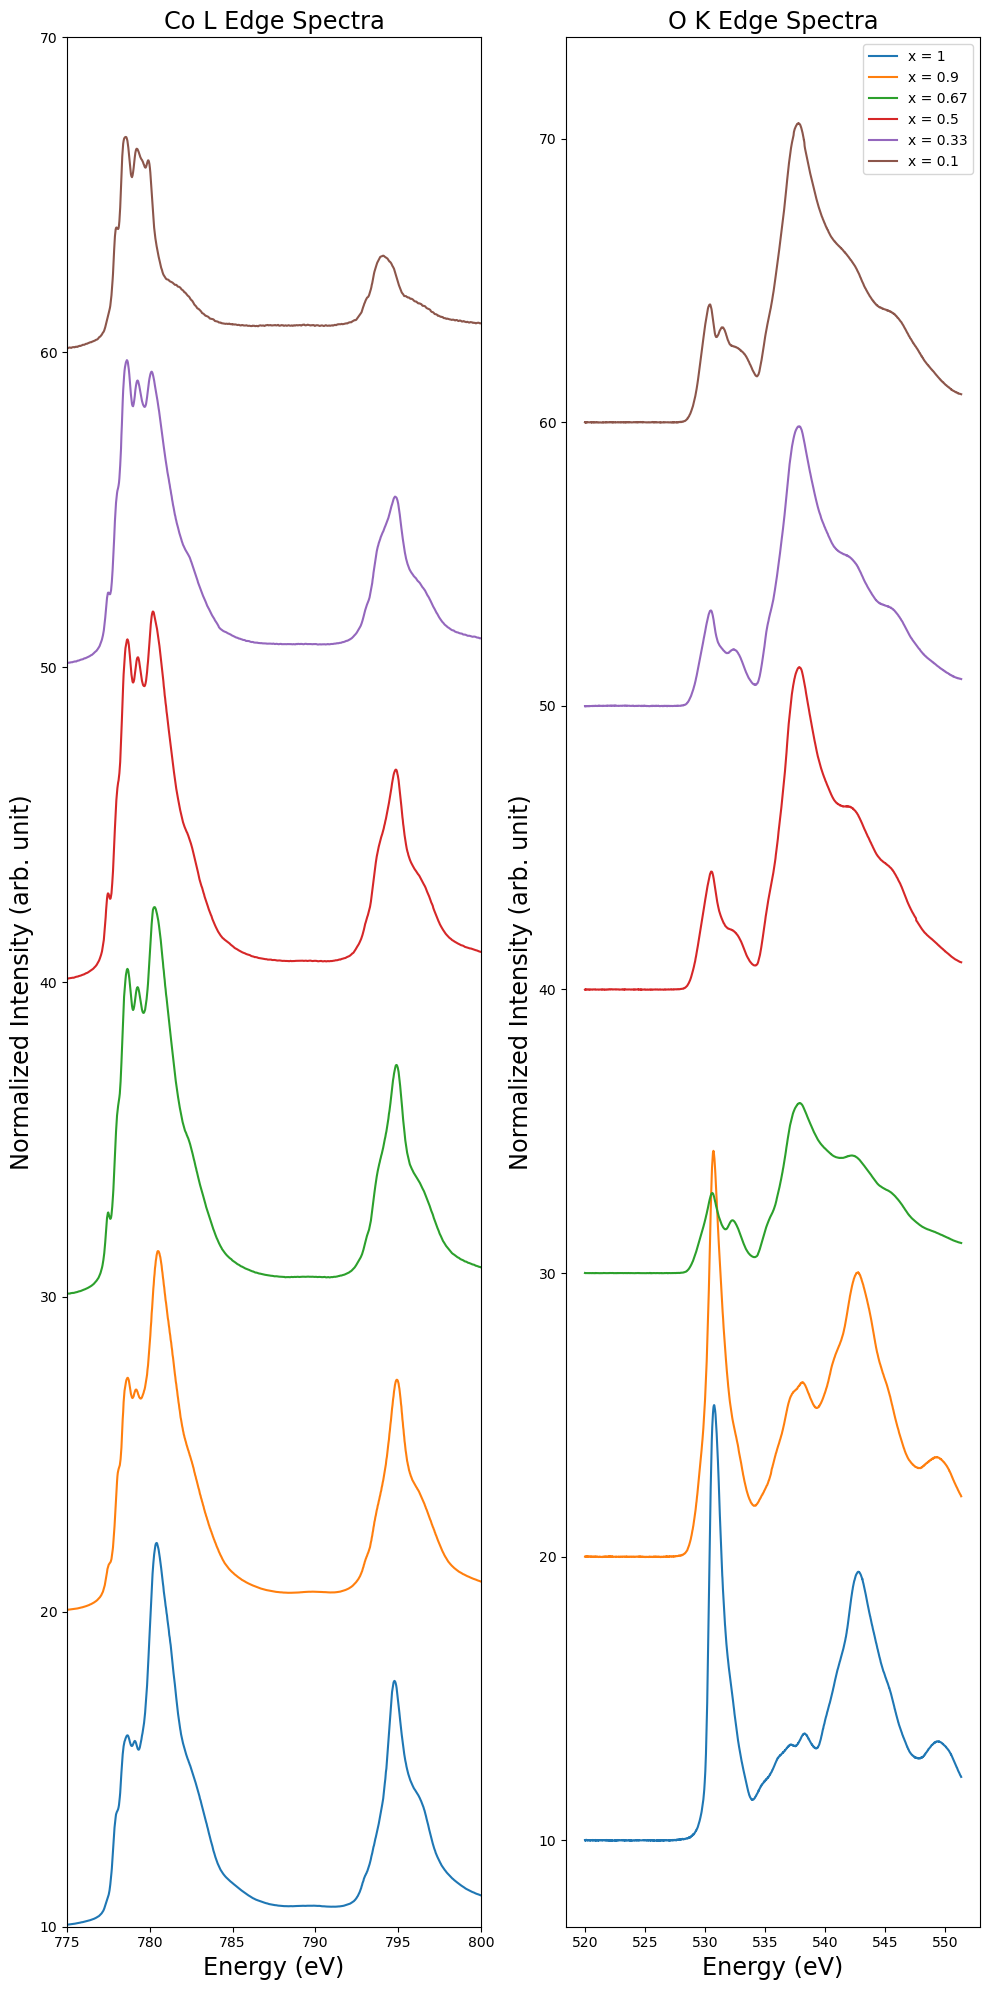

In [152]:
# extracting first set of x data from dataframe
x_1 = df2.iloc[1:2528,1]

# extracting compositions' data
y10_1 = df2.iloc[1:2528,2] + 10 # adding intervals of 10 create a stacked plot that is easier to read
y9_1 = df2.iloc[1:2528,3] + 20
y67_1 = df2.iloc[1:2528,4] + 30
y5_1 = df2.iloc[1:2528,5] + 40
y33_1 = df2.iloc[1:2528,6] + 50
y1_1 = df2.iloc[1:2528,7] + 60

# extracting second set of data
x_2 = df2.iloc[1:2528,9]

y10_2 = df2.iloc[1:2528,10] + 10
y9_2 = df2.iloc[1:2528,11] + 20
y67_2 = df2.iloc[1:2528,12] + 30
y5_2 = df2.iloc[1:2528,13] + 40
y33_2 = df2.iloc[1:2528,14] + 50
y1_2 = df2.iloc[1:2528,15] + 60

# a subplot to fit both graphs
fig, axs = plt.subplots(1, 2, figsize = (10, 20))

# first subplot
axs[0].plot(x_1, y10_1, label = 'x = 1')
axs[0].plot(x_1, y9_1, label = 'x = 0.9')
axs[0].plot(x_1, y67_1, label = 'x = 0.67')
axs[0].plot(x_1, y5_1, label = 'x = 0.5')
axs[0].plot(x_1, y33_1, label = 'x = 0.33')
axs[0].plot(x_1, y1_1, label = 'x = 0.1')
axs[0].set_title('Co L Edge Spectra', fontsize = 'xx-large')
axs[0].set_xlabel('Energy (eV)', fontsize = 'xx-large')
axs[0].set_ylabel('Normalized Intensity (arb. unit)', fontsize = 'xx-large')
axs[0].set_xlim(775,800)
axs[0].set_ylim(10,70)

# second subplot
axs[1].plot(x_2, y10_2, label = 'x = 1')
axs[1].plot(x_2, y9_2, label = 'x = 0.9')
axs[1].plot(x_2, y67_2, label = 'x = 0.67')
axs[1].plot(x_2, y5_2, label = 'x = 0.5')
axs[1].plot(x_2, y33_2, label = 'x = 0.33')
axs[1].plot(x_2, y1_2, label = 'x = 0.1')
axs[1].legend()
axs[1].set_title('O K Edge Spectra', fontsize = 'xx-large')
axs[1].set_xlabel('Energy (eV)', fontsize = 'xx-large')
axs[1].set_ylabel('Normalized Intensity (arb. unit)', fontsize = 'xx-large')

plt.tight_layout()
plt.legend()
plt.show()

### Comparison of OER Activity of Catalysts With and Without Cobalt on the Surface

In [14]:
df3 = pd.read_excel("C:\\Users\\MakGod\\Downloads\\Raw data for CoIIinacid.xlsx", sheet_name = 'Figure 3')

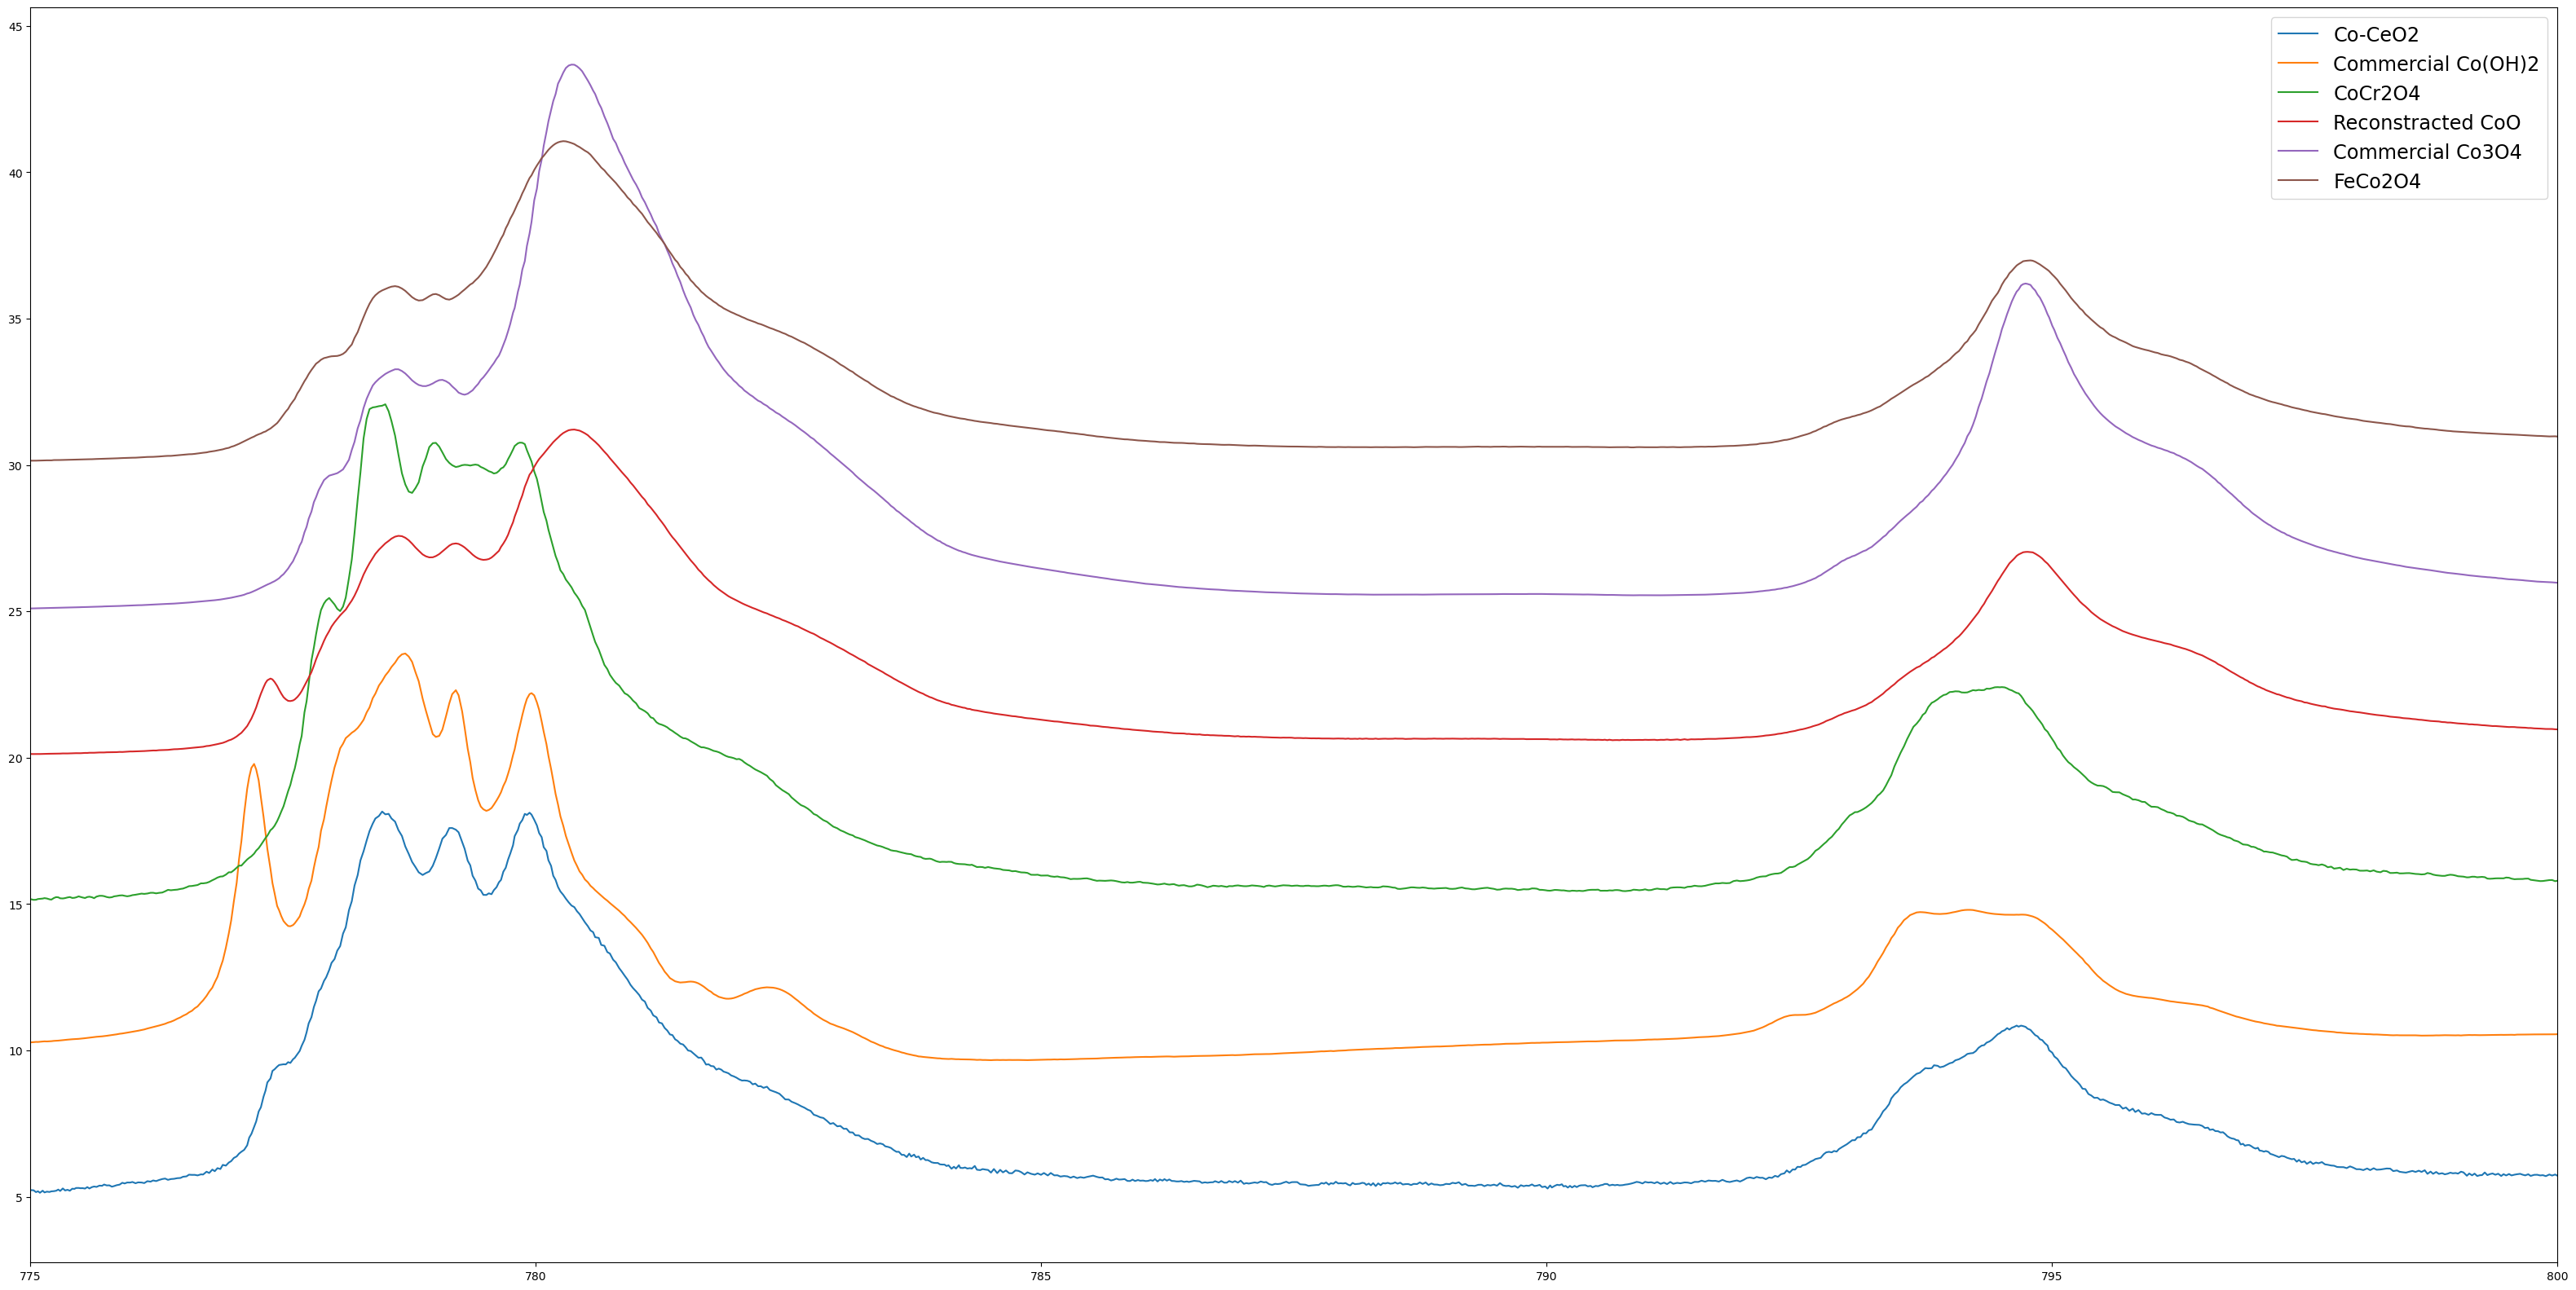

In [153]:
# extract x data
x = df3.iloc[1:,1]

# extract y data
y1 = df3.iloc[1:,2] + 5 # add intervals of 5 to create a stacked plot
y2 = df3.iloc[1:,3] + 10
y3 = df3.iloc[1:,4] + 15
y4 = df3.iloc[1:,5] + 20
y5 = df3.iloc[1:,6] + 25
y6 = df3.iloc[1:,7] + 30

plt.figure(figsize = (40,20))
plt.plot(x, y1, label = 'Co-CeO2')
plt.plot(x, y2, label = 'Commercial Co(OH)2')
plt.plot(x, y3, label = 'CoCr2O4')
plt.plot(x, y4, label = 'Reconstracted CoO')
plt.plot(x, y5, label = 'Commercial Co3O4')
plt.plot(x, y6, label = 'FeCo2O4')
plt.legend(fontsize = 'xx-large')
plt.xlim(775,800)
plt.show()

### Comparison of Tafel Slopes in Alkaline and Acidic Environments

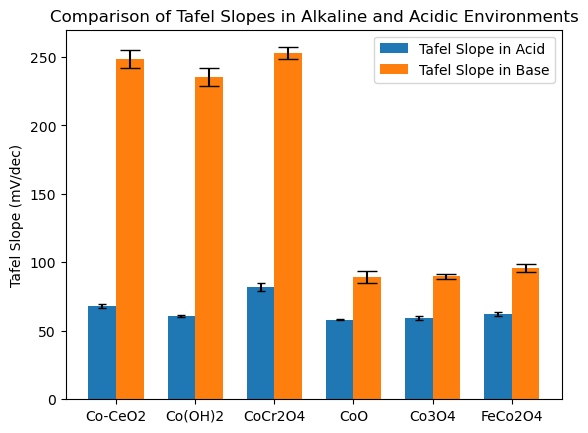

In [154]:
# extract labels from dataframe as listed
categories = df3.iloc[0:6,9]

# extract experimental and error values for both environments
acid_values = df3.iloc[0:6,10]
acid_errors = df3.iloc[0:6,11]

base_values = df3.iloc[0:6,12]
base_errors = df3.iloc[0:6,13]

bar_width = 0.35

# create a bar graph with actual and error values
plt.bar(np.arange(len(categories)), acid_values, width = bar_width, yerr = acid_errors, capsize = 3, label = 'Tafel Slope in Acid')
plt.bar(np.arange(len(categories)) + bar_width, base_values, width = bar_width, yerr = base_errors, capsize = 7, label = 'Tafel Slope in Base')
plt.title('Comparison of Tafel Slopes in Alkaline and Acidic Environments')
plt.ylabel('Tafel Slope (mV/dec)')
plt.xticks(np.arange(len(categories)) + bar_width / 2, categories)
plt.legend()
plt.show()